# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd



binsize=400
hashid='fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'

#df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/21f22d18c15db96f2a6ce96fdf640ced045b79a0fcb2ceacf61668e3.csv')
#station_locations_by_hash = df[df['hash'] == hashid]
save=df.to_csv('export2.csv')


In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [3]:
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

df['Temp'] = df['Data_Value']/10
df.Date = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['MD'] = df['Date'].dt.strftime('%m-%d')
# Remove February 29
df = df[df['MD']!='02-29']

thisyear=df[df['Year']==2015].sort_values(by='Date').set_index(['Date'])
df = df[df['Year'] < 2015]
print(df.head())
tmax=df[df['Element']=='TMAX'].dropna().sort_values(by='Date').set_index(['Date'])
tmax['Temp'] = tmax['Data_Value']/10
print(tmax.head())
tmaxy=tmax.groupby(tmax.index)['Temp'].max()

tmin=df[df['Element']=='TMIN'].dropna().sort_values(by='Date').set_index(['Date'])
tmin['Temp'] = tmin['Data_Value']/10
tminy=tmin.groupby(tmin.index)['Temp'].min()

thisyearmax=thisyear[thisyear['Element']=='TMAX'].dropna()
thisyearmin=thisyear[thisyear['Element']=='TMIN'].dropna()



            ID       Date Element  Data_Value  Temp  Year     MD
0  USW00093197 2007-11-20    TMAX         178  17.8  2007  11-20
1  USC00047785 2012-08-29    TMIN         222  22.2  2012  08-29
2  USW00093197 2013-04-13    TMIN         139  13.9  2013  04-13
3  USR0000CTE2 2005-03-16    TMIN          39   3.9  2005  03-16
4  USC00042214 2010-11-14    TMAX         239  23.9  2010  11-14
                     ID Element  Data_Value  Temp  Year     MD
Date                                                          
2005-01-01  USR0000CSIV    TMAX         111  11.1  2005  01-01
2005-01-01  USR0000CCHB    TMAX         100  10.0  2005  01-01
2005-01-01  USW00023152    TMAX         122  12.2  2005  01-01
2005-01-01  USW00003167    TMAX         139  13.9  2005  01-01
2005-01-01  USR0000CSAU    TMAX          94   9.4  2005  01-01


In [4]:
#find the max and min day for day between 2005 and 2014
recordhigh=tmax.groupby('MD')['Temp'].max()
recordlow=tmin.groupby('MD')['Temp'].min()

max_2015=thisyearmax.groupby('MD')['Temp'].max()
min_2015=thisyearmin.groupby('MD')['Temp'].min()

new_record_high=max_2015[max_2015>recordhigh]
new_record_low=min_2015[min_2015<recordlow]
new_record_high.index = pd.to_datetime('2015-'+ new_record_high.index,format='%Y-%m-%d')
new_record_low.index = pd.to_datetime('2015-'+ new_record_low.index,format='%Y-%m-%d')
recordhigh.index =  pd.to_datetime('2015-'+ recordhigh.index,format='%Y-%m-%d')
recordlow.index = pd.to_datetime('2015-'+ recordlow.index,format='%Y-%m-%d')

<IPython.core.display.Javascript object>


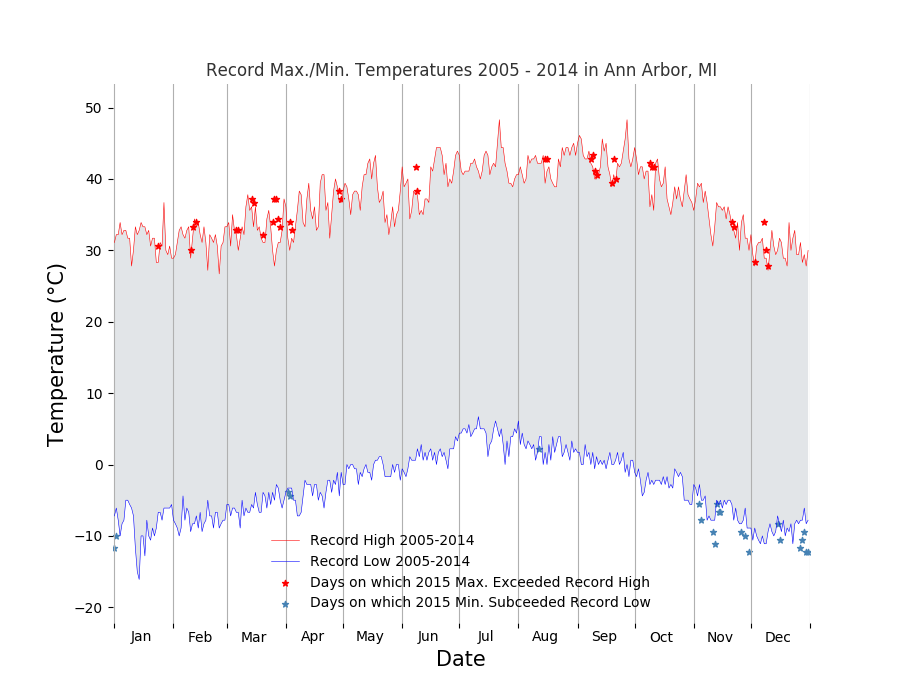

In [5]:
%matplotlib notebook
plt.figure(figsize=(9, 7))
plt.plot(recordhigh.index, recordhigh, c='red', linewidth=0.4, aa=True, label='Record High 2005-2014')
plt.plot(recordlow.index, recordlow, c='blue', linewidth=0.4, aa=True, label='Record Low 2005-2014')
plt.gca().fill_between(recordhigh.index, 
                       recordlow, recordhigh, 
                       facecolor='slategrey', 
                       alpha=0.2)

plt.scatter(new_record_high.index, new_record_high, marker='*', c='red', s=20, label='Days on which 2015 Max. Exceeded Record High')
plt.scatter(new_record_low.index, new_record_low, marker='*', c='steelblue', s=20,label='Days on which 2015 Min. Subceeded Record Low')  

plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=15)
plt.title('Record Max./Min. Temperatures 2005 - 2014 in Ann Arbor, MI', alpha=0.8)
plt.legend(loc='lower center', frameon=False)


#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Set x and y limits.
ax = plt.gca()
ax.axis([recordhigh.index[0]-pd.Timedelta('1 day'), 
         recordhigh.index[-1]+pd.Timedelta('1 day'), 
         new_record_low.min()-10, 
         new_record_high.max()+10])

# Format the xticks to show the month centered
# Original code can be found here:
# http://matplotlib.org/examples/pylab_examples/centered_ticklabels.html
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
plt.grid(which='major', axis='x')